# Azimuthal Horizontal-to-Vertical Spectral Ratio (HVSR) Measurements using Microtremor Recordings (mHVSR)

## License Information

This file is part of _hvsrpy_, a Python package for horizontal-to-vertical spectral ratio processing.

    Copyright (C) 2019-2023 Joseph P. Vantassel (joseph.p.vantassel@gmail.com)

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https: //www.gnu.org/licenses/>.
    
## About _hvsrpy_

_hvsrpy_ is an open-source Python package for performing horizontal-to-vertical spectral ratio (HVSR) processing of microtremor and earthquake recordings. _hvsrpy_ was developed by [Jospeh P. Vantassel](https://www.jpvantassel.com/) with contributions from Dana M. Brannon under the supervision of Brady R. Cox at The University of Texas at Austin. _hvsrpy_ continues to be developed and maintained by [Joseph P. Vantassel and his research group at Virginia Tech](https://geoimaging-research.org/).

## Citation

If you use _hvsrpy_ in your research or consulting, we ask you please cite the following:

>Joseph Vantassel. (2020). jpvantassel/hvsrpy: latest (Concept). Zenodo.
[http://doi.org/10.5281/zenodo.3666956](http://doi.org/10.5281/zenodo.3666956)

_Note: For software, version specific citations should be preferred to
general concept citations, such as that listed above. To generate a version
specific citation for hvsrpy, please use the citation tool on the hvsrpy
[archive](http://doi.org/10.5281/zenodo.3666956)._

## About this notebook

The statistical calculations to consider azimuthal variability included in `hvsrpy` and
showcased in this notebook were developed by Tianjian Cheng under the supervision of
Brady R. Cox at The University of Texas at Austin and are detailed in
Cheng et al (2020). To recognize their original work please cite the follwing:

> Cheng, T., Cox, B. R., Vantassel, J. P., and Manuel, L. (2020). "A statistical approach to account for azimuthal variability in single-station HVSR measurements." Geophysical Journal International, 223(2), 1040–1053. https://doi.org/10.1093/gji/ggaa342

## Getting Started

1. Install _hvsrpy_, with `pip install hvsrpy`. More information on _pip_ can be found [here](https://jpvantassel.github.io/python3-course/#/intro/pip). __(~3 minutes)__
2. Try analyzing the provided example. __(~10 minutes)__
3. Try your own files by changing the file names below. __(~15 minutes)__

Happy Processing!

In [1]:
import time
import pathlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

import hvsrpy
from hvsrpy import plot_tools

plt.style.use("data/hvsrpy.mplstyle")

## Input Data

In [9]:
#
fnames = [["./data/UT.STN11.A2_C150.miniseed"]]

print(f"Number of recordings: {len(fnames)}")
for fname_set in fnames:
    for file in fname_set:
        if not pathlib.Path(file).exists():
            raise FileNotFoundError(f"file {file} not found; check spelling.")
print("All files exists.")

Number of recordings: 1
All files exists.


## Preprocessing Settings

In [39]:
preprocessing_settings = hvsrpy.settings.HvsrPreProcessingSettings()
preprocessing_settings.detrend = "constant"
preprocessing_settings.window_length_in_seconds = 300
preprocessing_settings.orient_to_degrees_from_north = 0.0
preprocessing_settings.filter_corner_frequencies_in_hz = (None, None)
preprocessing_settings.ignore_dissimilar_time_step_warning = False

print("Preprocessing Summary")
print("-"*60)
preprocessing_settings.psummary()

Preprocessing Summary
------------------------------------------------------------
hvsrpy_version                      : 2.0.0rc4
orient_to_degrees_from_north        : 0.0
filter_corner_frequencies_in_hz     : (None, None)
window_length_in_seconds            : 300
detrend                             : constant


## Processing Settings

In [40]:
processing_settings = hvsrpy.settings.HvsrAzimuthalProcessingSettings()
processing_settings.window_type_and_width = ("tukey", 0.1)
processing_settings.smoothing=dict(operator="konno_and_ohmachi",
                                   bandwidth=40,
                                   center_frequencies_in_hz=np.geomspace(0.1, 50, 200))
processing_settings.handle_dissimilar_time_steps_by = "frequency_domain_resampling"
processing_settings.azimuths_in_degrees = np.arange(0, 180, 5)

print("Processing Summary")
print("-"*60)
processing_settings.psummary()

Processing Summary
------------------------------------------------------------
hvsrpy_version                      : 2.0.0rc4
window_type_and_width               : ('tukey', 0.1)
smoothing_operator_and_bandwidth    : ('konno_and_ohmachi', 40)
fft_settings                        : None
handle_dissimilar_time_steps_by     : frequency_domain_resampling
processing_method                   : azimuthal


## Calculate HVSR

In [41]:
srecords = hvsrpy.read(fnames)
srecords = hvsrpy.preprocess(srecords, preprocessing_settings)
hvsr = hvsrpy.process(srecords, processing_settings)

## Plot Settings

In [42]:
# Manually set the ylimits of the HVSR figures. Default is None so limits will be set automatically.
ymin, ymax = 0, 10

distribution_mc = "lognormal"
distribution_f0 = "lognormal"

## Plot HVSR

/tmp/ipykernel_16425/4064208818.py:22: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  getattr(ax, f"w_{coord}axis").set_pane_color((1, 1,1))
/tmp/ipykernel_16425/4064208818.py:22: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  getattr(ax, f"w_{coord}axis").set_pane_color((1, 1,1))
/tmp/ipykernel_16425/4064208818.py:22: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  getattr(ax, f"w_{coord}axis").set_pane_color((1, 1,1))
/tmp/ipykernel_16425/4064208818.py:27: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist=12


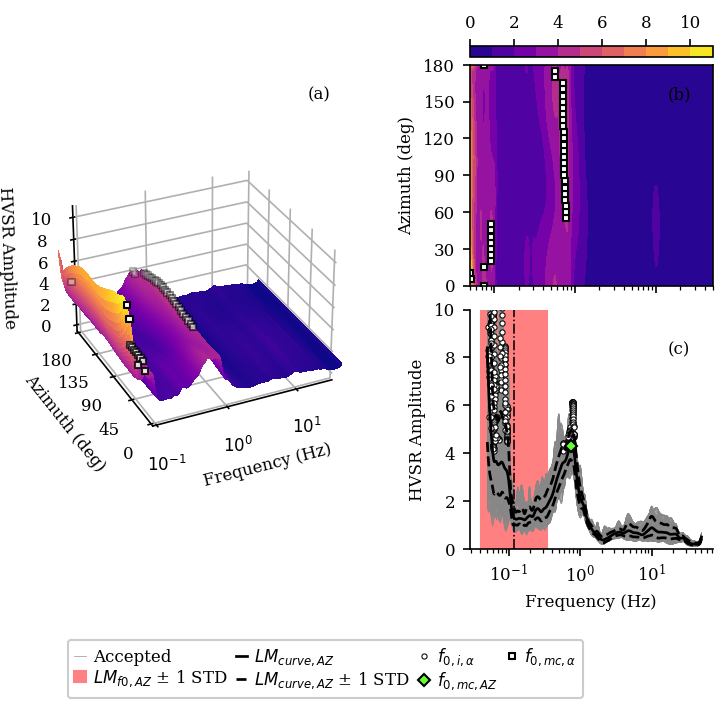

In [43]:
azimuths = [*hvsr.azimuths, 180.]
mesh_frq, mesh_azi = np.meshgrid(hvsr.frequency, azimuths)
mesh_amp = hvsr.mean_curve_by_azimuth(distribution=distribution_mc)
mesh_amp = np.vstack((mesh_amp, mesh_amp[0]))

# Layout
fig = plt.figure(figsize=(6,5), dpi=150)
gs = fig.add_gridspec(nrows=2, ncols=2, wspace=0.3, hspace=0.1, width_ratios=(1.2,0.8))
ax0 = fig.add_subplot(gs[0:2, 0:1], projection='3d')
ax1 = fig.add_subplot(gs[0:1, 1:2])
ax2 = fig.add_subplot(gs[1:2, 1:2])
fig.subplots_adjust(bottom=0.21) 

# Settings
individual_width = 0.3
median_width = 1.3

## 3D Median Curve
ax = ax0
ax.plot_surface(np.log10(mesh_frq), mesh_azi, mesh_amp, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)
for coord in list("xyz"):
    getattr(ax, f"w_{coord}axis").set_pane_color((1, 1,1))    
ax.set_xticks(np.log10(np.array([0.01, 0.1, 1, 10, 100])))
ax.set_xticklabels(["$10^{"+str(x)+"}$" for x in range(-2, 3)])
ax.set_xlim(np.log10((0.1, 30)))
ax.view_init(elev=30, azim=245)
ax.dist=12
ax.set_yticks(np.arange(0,180+45, 45))
ax.set_ylim(0,180)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Azimuth (deg)")
ax.set_zlabel("HVSR Amplitude")
pfrqs, pamps = hvsr.mean_curve_peak_by_azimuth(distribution=distribution_mc)
pfrqs = np.array([*pfrqs, pfrqs[0]])
pamps = np.array([*pamps, pamps[0]])
ax.scatter(np.log10(pfrqs), azimuths, pamps*1.01, marker="s", c="w", edgecolors="k", s=9)

## 2D Median Curve
ax = ax1
contour = ax.contourf(mesh_frq, mesh_azi, mesh_amp, cmap=cm.plasma, levels=10)
ax.set_xscale("log")
ax.set_xticklabels([])
ax.set_ylabel("Azimuth (deg)")
ax.set_yticks(np.arange(0,180+30, 30))
ax.set_ylim(0,180)
divider = make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", pad=0.05)
fig.colorbar(contour, cax=cax, orientation="horizontal")
cax.xaxis.set_ticks_position("top")

ax.plot(pfrqs, azimuths, marker="s", color="w", linestyle="", markersize=3, markeredgecolor="k",
        label=r"$f_{0,mc,\alpha}$")

## 2D Median Curve
ax = ax2

# Accepted Windows
label="Accepted"
for amps in hvsr.amplitude:
    for amp in amps:
        ax.plot(hvsr.frequency, amp, color="#888888", linewidth=individual_width, zorder=2, label=label)
        label=None

# Mean Curve
label = r"$LM_{curve,AZ}$" if distribution_mc=="lognormal" else r"$Mean_{curve,AZ}$"
ax.plot(hvsr.frequency, hvsr.mean_curve(distribution_mc), color='k', label=label, linewidth=median_width, zorder=4)

# Mean +/- Curve
label = r"$LM_{curve,AZ}$"+" ± 1 STD" if distribution_mc=="lognormal" else r"$Mean_{curve,AZ}$"+" ± 1 STD"
ax.plot(hvsr.frequency, hvsr.nth_std_curve(-1, distribution=distribution_mc), color="k", linestyle="--",
        linewidth=median_width, zorder=4, label=label)
ax.plot(hvsr.frequency, hvsr.nth_std_curve(+1, distribution=distribution_mc), color="k", linestyle="--",
        linewidth=median_width, zorder=4)

# Window Peaks
label = r"$f_{0,i,\alpha}$"
for frq, amp in zip(hvsr.peak_frequencies, hvsr.peak_amplitudes):
    ax.plot(frq, amp, linestyle="", zorder=3, marker='o', markersize=2.5, markerfacecolor="#ffffff",
            markeredgewidth=0.5, markeredgecolor='k', label=label)
    label=None

# Peak Mean Curve
ax.plot(*hvsr.mean_curve_peak(distribution_mc), linestyle="", zorder=5,
        marker='D', markersize=4, markerfacecolor='#66ff33', markeredgewidth=1, markeredgecolor='k', 
        label = r"$f_{0,mc,AZ}$")

# f0,az
if ymin is not None and ymax is not None:
        ax.set_ylim((ymin, ymax))
label = r"$LM_{f0,AZ}$"+" ± 1 STD" if distribution_f0=="lognormal" else "Mean "+r"$f_{0,AZ}$"+" ± 1 STD"
_ymin, _ymax = ax.get_ylim()
ax.plot([hvsr.mean_fn_frequency(distribution_f0)]*2, [ymin, ymax], linestyle="-.", color="#000000", zorder=6)
ax.fill([hvsr.nth_std_fn_frequency(-1, distribution_f0)]*2 + [hvsr.nth_std_fn_frequency(+1, distribution_f0)]*2, [_ymin, _ymax, _ymax, _ymin], 
        color = "#ff8080", label=label, zorder=1)
ax.set_ylim((_ymin, _ymax))

# Limits and labels
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("HVSR Amplitude")
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
    
# Lettering
xs, ys = [0.45, 0.85, 0.85], [0.81, 0.81, 0.47]  
for x, y, letter in zip(xs, ys, list("abc")):
    fig.text(x, y, f"({letter})")
    
# Legend
handles, labels = [], []
for ax in [ax2, ax1, ax0]:
        _handles, _labels = ax.get_legend_handles_labels()
        handles += _handles
        labels += _labels
new_handles, new_labels = [], []
for index in [0, 5, 1, 2, 3, 4, 6]:
    new_handles.append(handles[index])
    new_labels.append(labels[index])
fig.legend(new_handles, new_labels, loc="lower center", bbox_to_anchor=(0.47, 0), ncol=4,
           columnspacing=0.5, handletextpad=0.4)

# Print stats
# print("\nStatistics after rejection considering azimuth:")
# hvsr.print_stats(distribution_f0)
plt.show()    

## Save Figure to File
---

In [ ]:
# figure_name_out = "example_hvsr_figure_az.png"

# fig.savefig(figure_name_out, dpi=300, bbox_inches='tight')
# plt.close()
# print("Figure saved successfully!")

## Save Results to Text File
---

In [ ]:
# file_name_out = "example_output_hvsrpy_az.hv"

# hv.to_file(file_name_out, distribution_f0, distribution_mc)
# print("Results saved successfully!")